In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import trueq as tq

# create a Haar random SU(2) gate and print its matrix representation
U = tq.Gate.random(2)
U

Gate(Y, X, ...)

In [3]:
synthesized_gate = tq.math.QubitMode.ZXZXZ.decompose(U)

# print the synthesized gate as a list of single-qubit rotations about Z and X
synthesized_gate

[('Z', -257.7385690112652),
 ('X', 90),
 ('Z', 122.042638725902),
 ('X', 90),
 ('Z', -106.283141468562)]

In [4]:
# define the gate to be synthesized
gate_to_be_synthesized = tq.Gate.random(4)

# re-express the gate using an iswap gate as the two-qubit gate
two_qubit_synthesized_gate = tq.math.decompose_unitary(
    target_gate=gate_to_be_synthesized, given_gate=tq.Gate.iswap
)

# print the synthesized gate
two_qubit_synthesized_gate

Circuit(Cycle((0,): Gate(Y, X, ...), (1,): Gate(Y, X, ...)),Cycle((0, 1): Gate.iswap),Cycle((0,): Gate(Y, X, ...), (1,): Gate(Y, X, ...)),Cycle((0, 1): Gate.iswap),Cycle((0,): Gate(Y, X, ...), (1,): Gate(Y, X, ...)),Cycle((0, 1): Gate.iswap),Cycle((0,): Gate(Y, X, ...), (1,): Gate(Y, X, ...)))

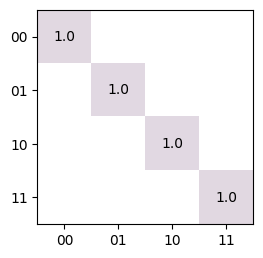

In [5]:
matrix = tq.Simulator().operator(two_qubit_synthesized_gate).mat()

# This will result in an identity gate up to a global complex phase.
tq.plot_mat(matrix @ gate_to_be_synthesized.adj.mat)